# Imports

In [ ]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the data and apply sentiment analysis

In [39]:
# Load the dataset
csv_file_path = '/content/out_wit_tra2.csv'
df = pd.read_csv(csv_file_path, encoding='utf-8')

# Apply TextBlob sentiment analysis to the 'text' column
df['review_sentiment'] = df['tr'].apply(lambda text: TextBlob(text).sentiment.polarity if pd.notnull(text) else None)

# Optionally, if you have an existing polarity column in the dataset and want to compare:
df['sentiment_vs_polarity'] = df.apply(lambda row: row['review_sentiment']*10 - row['polarity'], axis=1)

# Display the results (show first few rows)
print(df[['tr', 'review_sentiment', 'polarity', 'sentiment_vs_polarity']].head())

# Save the results to a new CSV file
df.to_csv('EVERYTHING_with_sentiment.csv', index=False)

print(f"Sentiment analysis completed and saved to 'EVERYTHING_with_sentiment.csv'")

                                                  tr  review_sentiment  \
0                   It's a delicious steigerburger!!              1.00   
1  Top tent.. 10 minutes, nobody was at the table...              0.25   
2   Please be advised by the hostess at menu choice.              0.00   
3                              Eat, drink, and swim!              0.00   
4  Just wonderfull.... great place to hang out, c...              0.90   

   polarity  sentiment_vs_polarity  
0      10.0                    0.0  
1      10.0                   -7.5  
2       5.0                   -5.0  
3      10.0                  -10.0  
4      10.0                   -1.0  
Sentiment analysis completed and saved to 'EVERYTHING_with_sentiment.csv'


# Do some data preprocessing

In [33]:
# Drop rows where 'A' column has NaN values
df.dropna(subset=['review_sentiment'], inplace=True)

In [47]:
# Function to check if any word appears more than 3 times
def has_word_more_than_three_times(text):
    words = text.split()
    word_counts = pd.Series(words).value_counts()
    return any(word_counts > 1)

# Apply the function and filter the DataFrame
df = df[~df['text'].apply(has_word_more_than_three_times)]

# Get the unigrams expressing the sentiment

In [50]:
# Define polarity ranges
positive_reviews = df[df['review_sentiment'] >= 0.2]['tr']
negative_reviews = df[df['review_sentiment'] <= -0.2]['tr']

# Function to get most common words and bigrams
def get_most_common_words_bigrams(reviews):
    # Initialize CountVectorizer for unigrams and bigrams
    vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')
    X = vectorizer.fit_transform(reviews)

    # Sum up the counts of each vocabulary word
    word_counts = X.toarray().sum(axis=0)

    # Get the words themselves
    words = vectorizer.get_feature_names_out()

    # Create a dictionary of words and their counts
    word_count_dict = dict(zip(words, word_counts))

    # Get the most common words and bigrams
    most_common_words_bigrams = Counter(word_count_dict).most_common(100)

    return most_common_words_bigrams

# Get most common words and bigrams for positive and negative reviews
positive_common_words_bigrams = get_most_common_words_bigrams(positive_reviews)
negative_common_words_bigrams = get_most_common_words_bigrams(negative_reviews)

print("Most common words and bigrams in positive reviews:")
print(positive_common_words_bigrams)

print("\nMost common words and bigrams in negative reviews:")
print(negative_common_words_bigrams)

Most common words and bigrams in positive reviews:
[('excellent', 4454), ('good', 2666), ('nice', 1793), ('best', 1691), ('super', 1231), ('great', 1041), ('awesome', 690), ('amazing', 649), ('pleasant', 626), ('service', 555), ('hotel', 549), ('place', 544), ('paris', 474), ('staff', 459), ('cool', 456), ('cocktail', 434), ('food', 429), ('recommend', 406), ('beautiful', 389), ('free', 360), ('quality', 340), ('bar', 290), ('fantastic', 273), ('wonderful', 272), ('pizza', 256), ('cheap', 252), ('friendly', 237), ('ok', 237), ('delicious', 221), ('home', 218), ('reasonable', 214), ('loved', 212), ('looks', 203), ('location', 201), ('indispensable', 197), ('resto', 195), ('ec', 194), ('pisa', 192), ('superman', 189), ('atmosphere', 188), ('château', 181), ('really', 177), ('light', 172), ('clean', 168), ('rapid', 165), ('perfect', 155), ('breakfast', 150), ('loyal', 150), ('love', 149), ('france', 144), ('try', 143), ('wifi', 134), ('sharing', 133), ('club', 132), ('coffee', 125), ('mus

# Visualize the unigrams

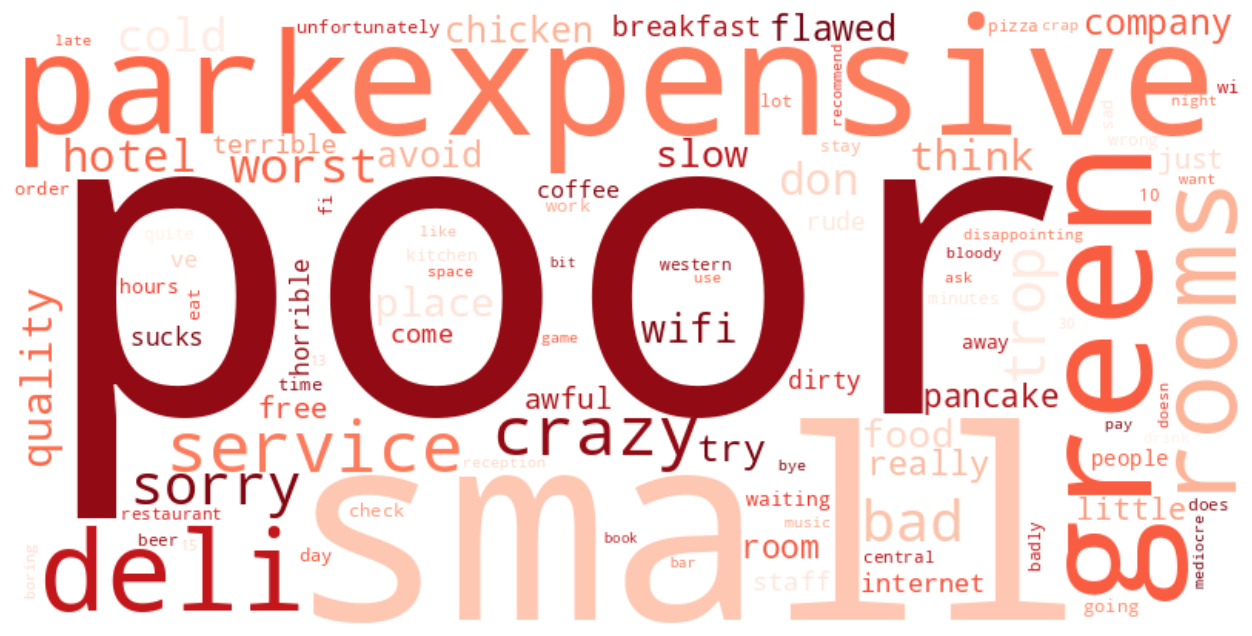

In [53]:
# Create dictionaries for word clouds
positive_word_freq = dict(positive_common_words_bigrams)
negative_word_freq = dict(negative_common_words_bigrams)

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(positive_word_freq)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(negative_word_freq)

# Plot the word clouds
plt.figure(figsize=(16, 8))

# plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
# plt.title('Positive Words')
plt.axis('off')
plt.savefig('positive_words.png')

plt.imshow(negative_wordcloud, interpolation='bilinear')
# plt.title('Positive Words')
plt.axis('off')
plt.savefig('negative_words.png')


# plt.savefig()